In [1]:
%cd ../
%matplotlib inline

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.htfa as HTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
new_pieman_word = niidb.FMriActivationsDb('data/new_pieman.db',
                                          mask='/home/eli/Documents/new_pieman/all_tasks/wholebrain.nii.gz')

In [5]:
htfa = HTFA.HierarchicalTopographicFactorAnalysis(list(new_pieman_word.all(_limit=30)), num_factors=25,
                                                  mask='/home/eli/Documents/new_pieman/all_tasks/wholebrain.nii.gz')

05/04/2018 18:24:22 Loading Nifti image /home/eli/Documents/new_pieman/all_tasks/sub-19-task-intact2.nii with mask /home/eli/Documents/new_pieman/all_tasks/wholebrain.nii.gz (zscore=True)
05/04/2018 18:24:24 Loading Nifti image /home/eli/Documents/new_pieman/all_tasks/sub-70-task-rest1.nii with mask /home/eli/Documents/new_pieman/all_tasks/wholebrain.nii.gz (zscore=True)
05/04/2018 18:24:25 Loading Nifti image /home/eli/Documents/new_pieman/all_tasks/sub-72-task-rest1.nii with mask /home/eli/Documents/new_pieman/all_tasks/wholebrain.nii.gz (zscore=True)
05/04/2018 18:24:27 Loading Nifti image /home/eli/Documents/new_pieman/all_tasks/sub-39-task-word.nii with mask /home/eli/Documents/new_pieman/all_tasks/wholebrain.nii.gz (zscore=True)
05/04/2018 18:24:29 Loading Nifti image /home/eli/Documents/new_pieman/all_tasks/sub-45-task-word.nii with mask /home/eli/Documents/new_pieman/all_tasks/wholebrain.nii.gz (zscore=True)
05/04/2018 18:24:30 Loading Nifti image /home/eli/Documents/new_pieman

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1291: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


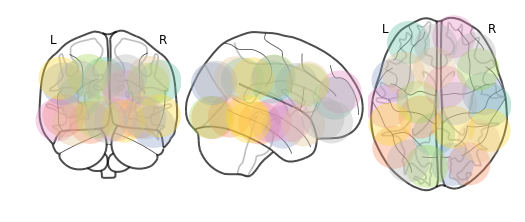

In [6]:
htfa.plot_factor_centers()

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1291: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


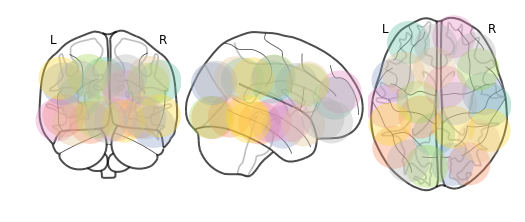

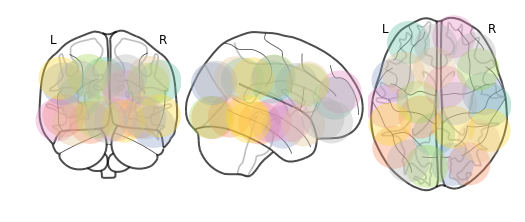

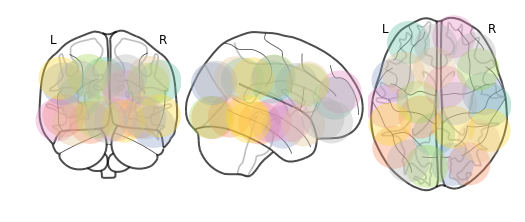

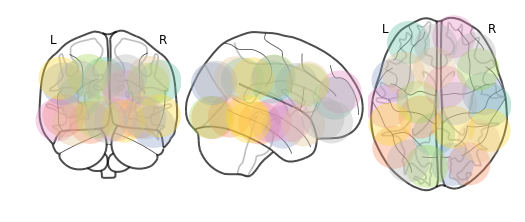

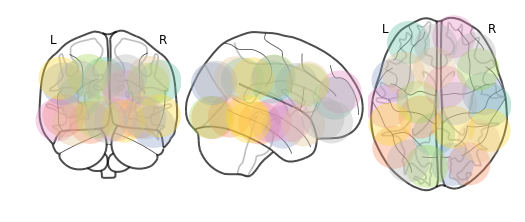

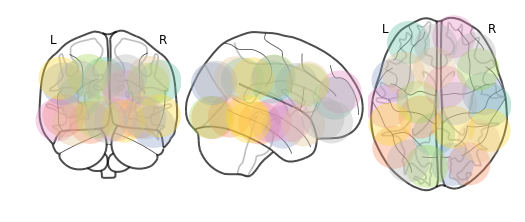

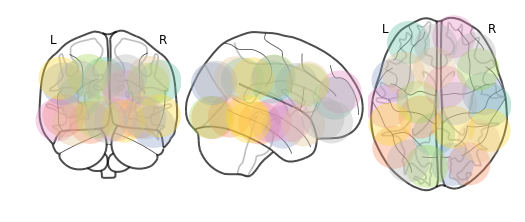

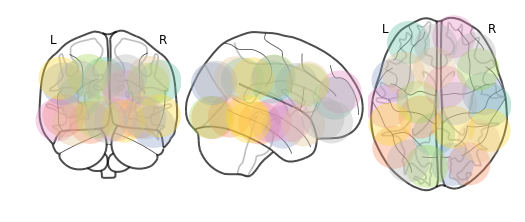

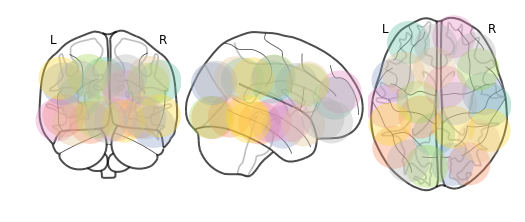

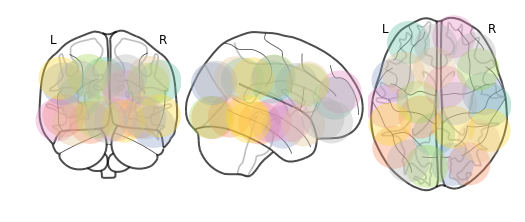

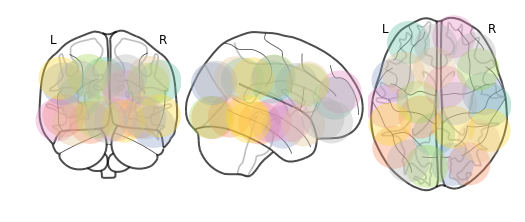

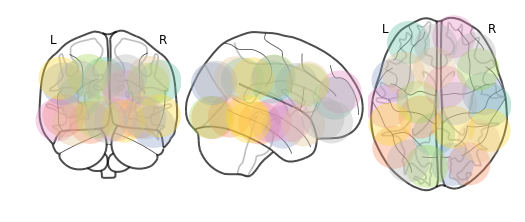

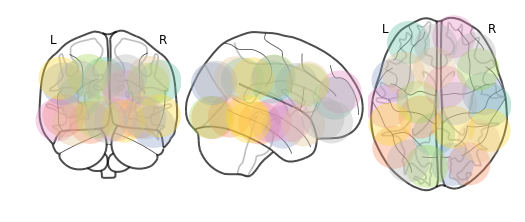

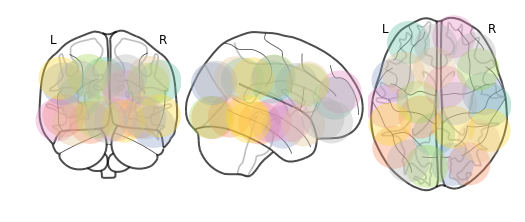

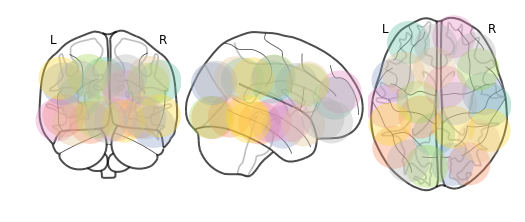

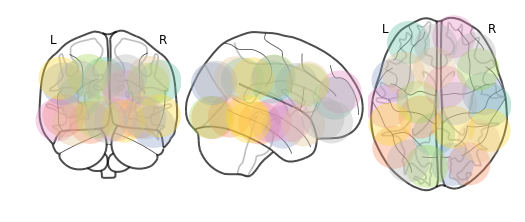

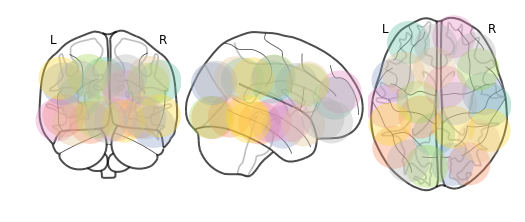

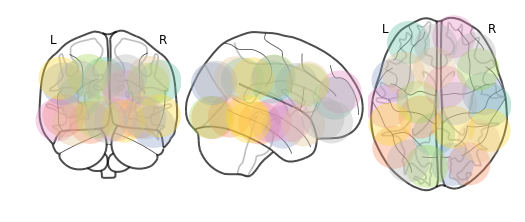

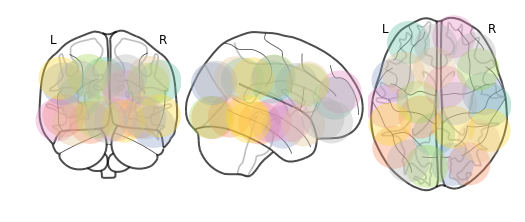

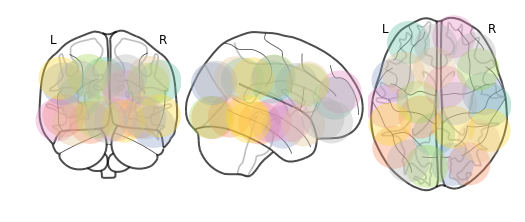

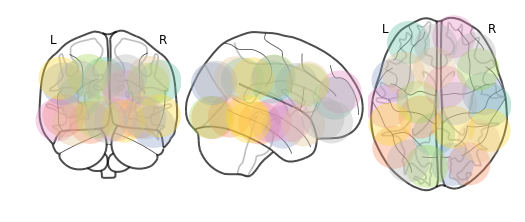

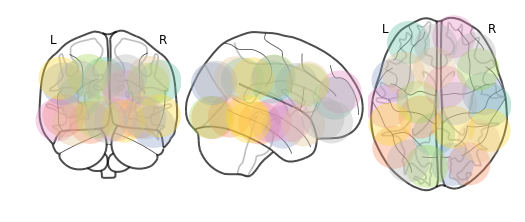

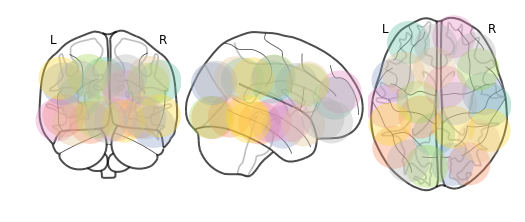

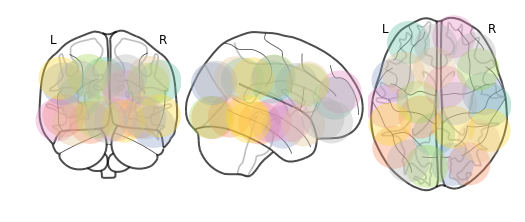

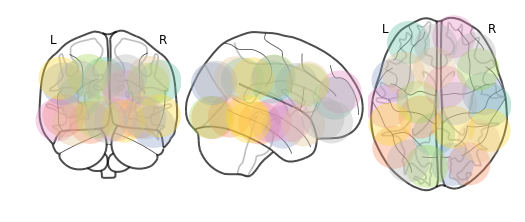

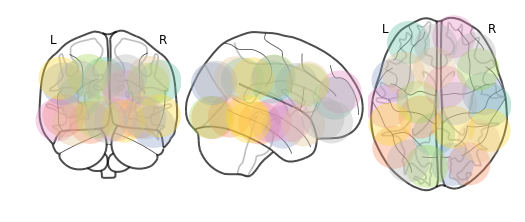

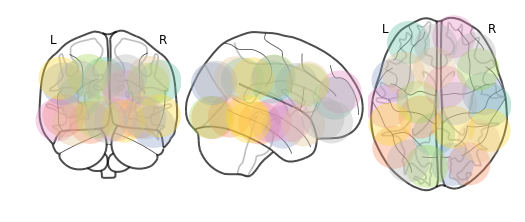

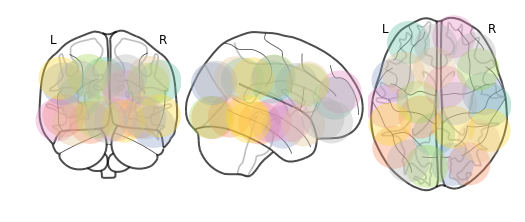

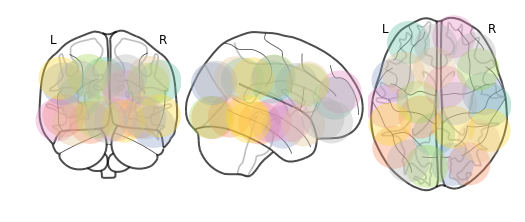

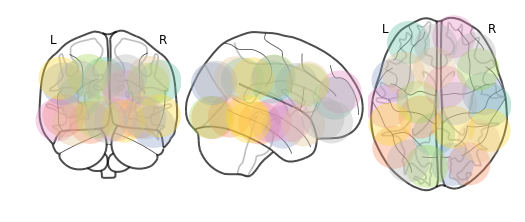

In [7]:
for b in range(htfa.num_blocks):
    htfa.plot_factor_centers(block=b)

In [8]:
losses = htfa.train(num_steps=200, learning_rate=1e-1, log_level=logging.INFO, num_particles=4,
                    batch_size=50, use_cuda=True, blocks_batch_size=2)

05/04/2018 18:29:00 [Epoch 1] (11109ms) Posterior free-energy 5.32396835e+11
05/04/2018 18:29:09 [Epoch 2] (8666ms) Posterior free-energy 1.75379677e+11
05/04/2018 18:29:18 [Epoch 3] (9187ms) Posterior free-energy 1.19783801e+11
05/04/2018 18:29:27 [Epoch 4] (9263ms) Posterior free-energy 1.07138294e+11
05/04/2018 18:29:37 [Epoch 5] (9689ms) Posterior free-energy 1.00941365e+11
05/04/2018 18:29:47 [Epoch 6] (9756ms) Posterior free-energy 9.67619379e+10
05/04/2018 18:29:57 [Epoch 7] (9773ms) Posterior free-energy 9.34722437e+10
05/04/2018 18:30:06 [Epoch 8] (9757ms) Posterior free-energy 9.09504020e+10
05/04/2018 18:30:16 [Epoch 9] (9827ms) Posterior free-energy 8.90077921e+10
05/04/2018 18:30:26 [Epoch 10] (9775ms) Posterior free-energy 8.76674826e+10
05/04/2018 18:30:36 [Epoch 11] (9688ms) Posterior free-energy 8.67215032e+10
05/04/2018 18:30:45 [Epoch 12] (8915ms) Posterior free-energy 8.60490220e+10
05/04/2018 18:30:53 [Epoch 13] (8884ms) Posterior free-energy 8.54320251e+10
05/04/2

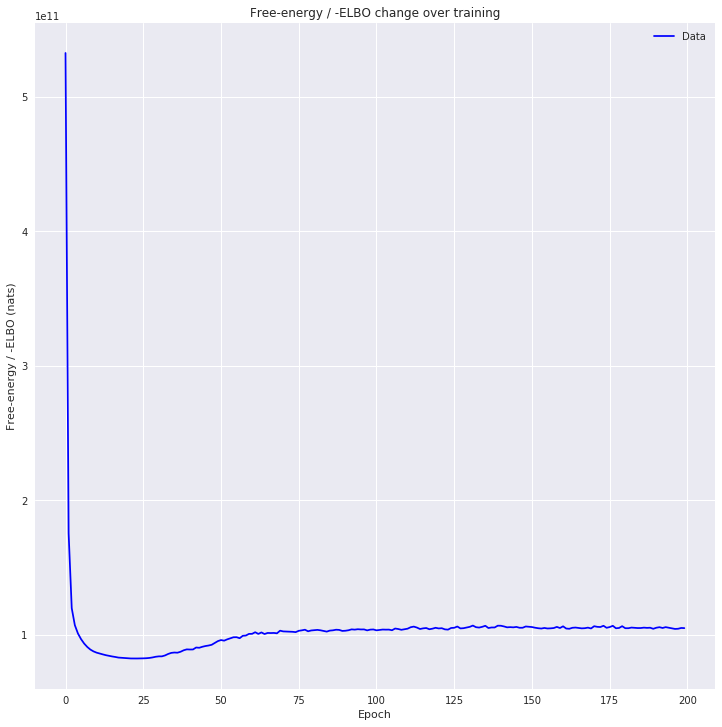

In [9]:
utils.plot_losses(losses)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1291: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


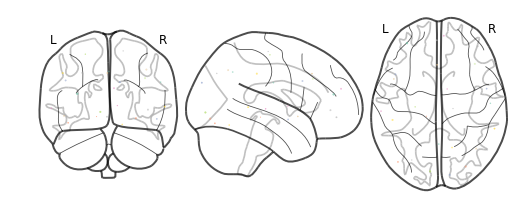

In [10]:
htfa.plot_factor_centers()

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1291: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


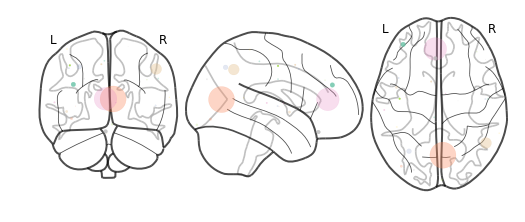

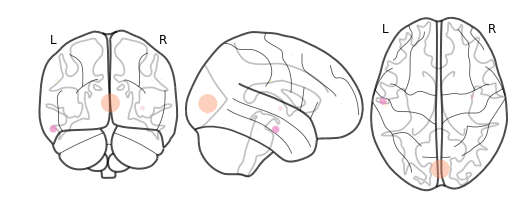

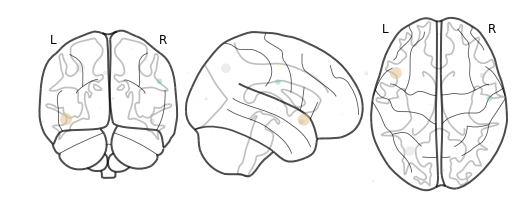

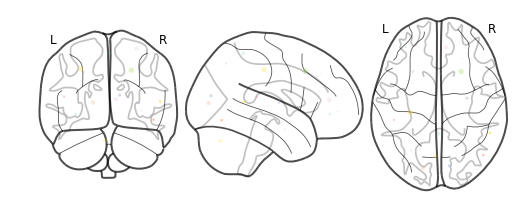

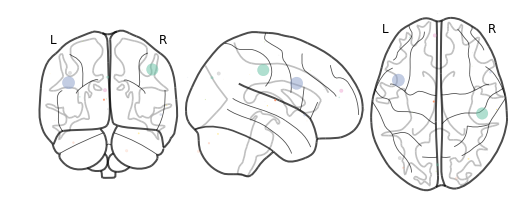

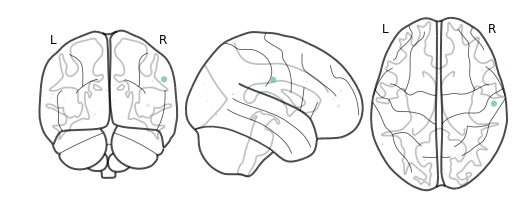

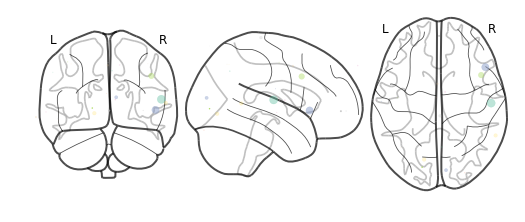

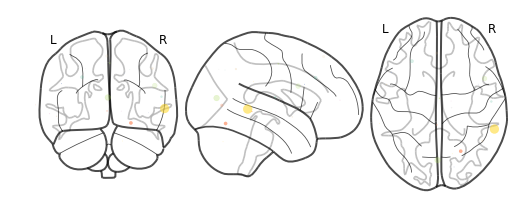

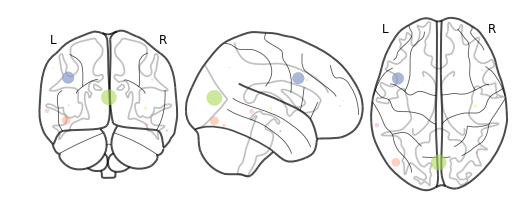

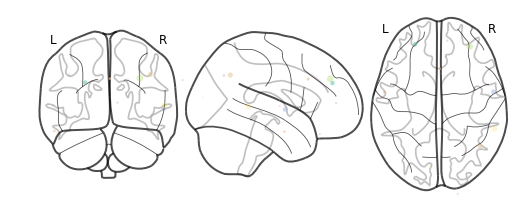

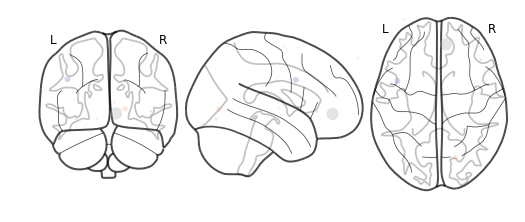

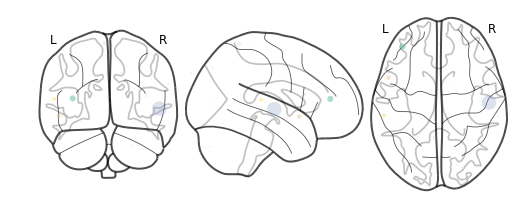

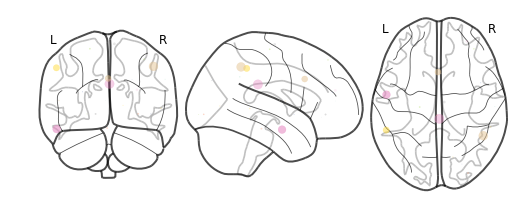

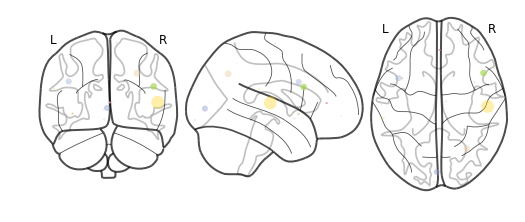

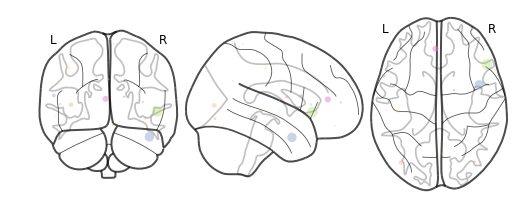

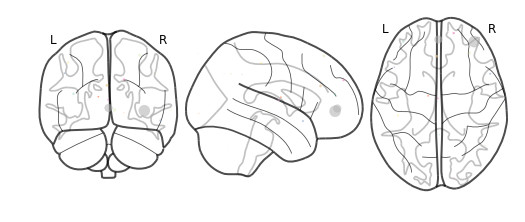

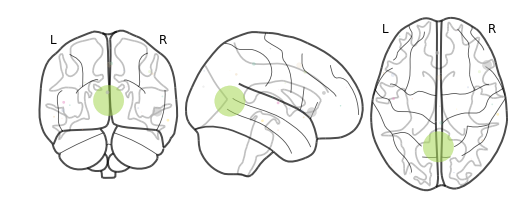

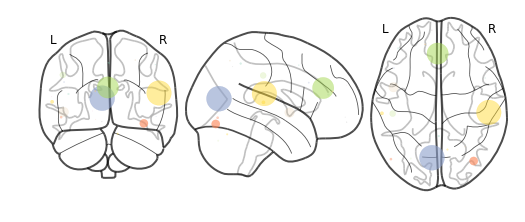

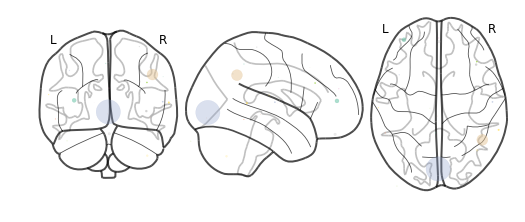

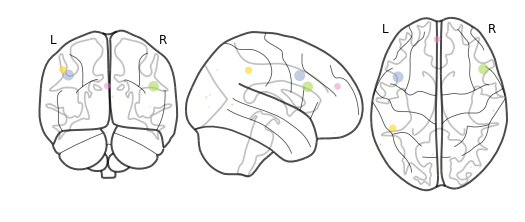

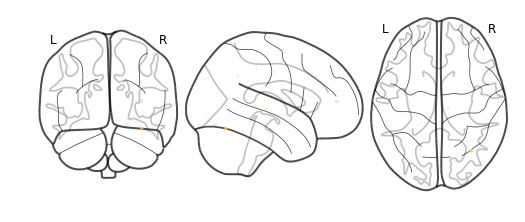

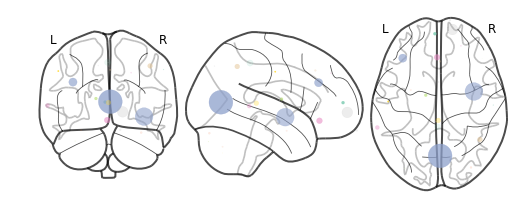

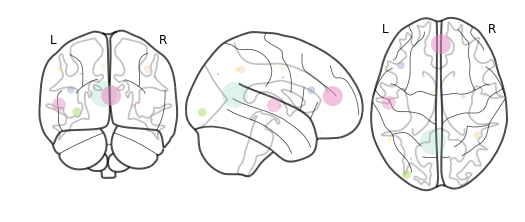

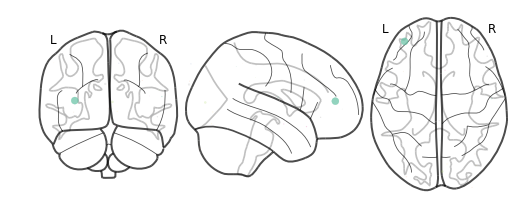

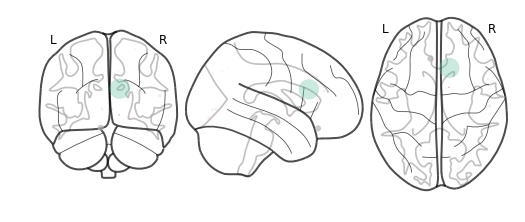

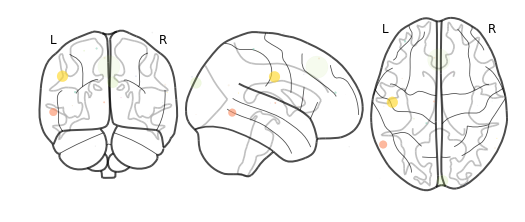

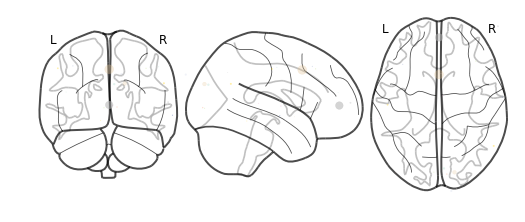

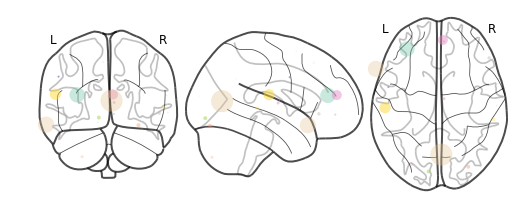

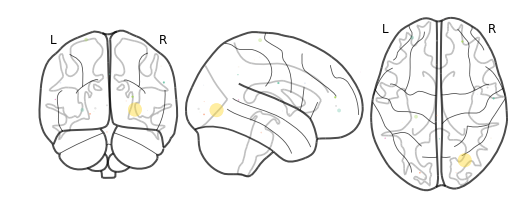

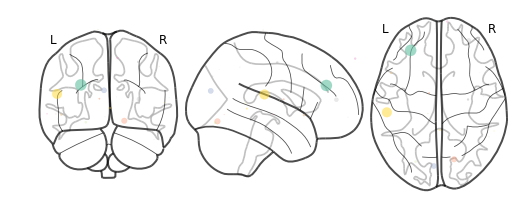

In [11]:
for b in range(htfa.num_blocks):
    htfa.plot_factor_centers(block=b)